<h2 style="color:green" align="center">Machine Learning With Python: Linear Regression With One Variable</h2>

<h3 style="color:purple">Sample problem of predicting home price in monroe, new jersey (USA)</h3>

Below table represents current home prices in monroe township based on square feet area, new jersey

<img src="homepricetable.JPG" style="width:370px;height:250px">

**Problem Statement**: Given above data build a machine learning model that can predict home prices based on square feet area


You can represent values in above table as a scatter plot (values are shown in red markers). After that one can draw a straight line that best fits values on chart. 

<img src="scatterplot.JPG" style="width:600px;height:370px">

<img src="equation.PNG" style="width:600px;height:370px" >

You might remember about linear equation from your high school days math class. Home prices can be presented as following equation,

home price = m * (area) + b

Generic form of same equation is,

<img src="linear_equation.png" >

In [40]:
import pandas as pd 
import numpy as np 
from sklearn import linear_model
import matplotlib.pyplot as plt 

In [41]:
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [5]:
df.area.min()

2600

In [6]:
df.area.max()

4000

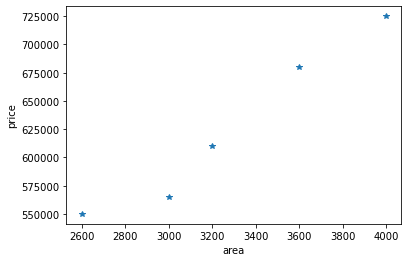

In [7]:
plt.xlabel('area')
plt.ylabel('price')
plt.plot(df.area,df.price,marker = '*',linestyle ='')

In [42]:
area_df = df.drop('price', axis = 'columns')
area_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [43]:
price_df = df.drop('area',axis='columns')
price_df

,price
0,550000
1,565000
2,610000
3,680000
4,725000


In [44]:
# create a linear regression object 

reg = linear_model.LinearRegression() # an instance of the linear regression model

# reg is the regression model 

reg.fit(area_df,price_df) # fits data as (x,y)

LinearRegression()

### Predicting some values 

In [20]:
print('The predicted price of a 3200 ft squared area is:',reg.predict([[3200]]))

The predicted price of a 3200 ft squared area is: [[615136.98630137]]


In [28]:
reg.predict([[3000],[4000]]) # can predict more than one price

array([[587979.45205479],
       [723767.12328767]])

In [21]:
reg.score(area_df, price_df) # calculates the accuracy of the model

0.9584301138199486

In [22]:
reg.coef_ # the regression coefficient  

array([[135.78767123]])

In [23]:
reg.intercept_ # the y-intercept of the regression line 

array([180616.43835616])

**If we use the intiution of Y = m * X + b (m is coefficient and b is intercept), we will get the a ver similar result to what our model predicted**

In [24]:
3200*135.78767123+180616.43835616

615136.98629216

In [25]:
reg.predict([[5000]])

array([[859554.79452055]])

### Generate a CSV File With Home Price Predictions 

In [27]:
area_df = pd.read_csv('areas.csv')
area_df

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [33]:
prices = reg.predict(area_df)
prices

array([[ 316404.10958904],
       [ 384297.94520548],
       [ 492928.08219178],
       [ 661304.79452055],
       [ 740061.64383562],
       [ 799808.21917808],
       [ 926090.75342466],
       [ 650441.78082192],
       [ 825607.87671233],
       [ 492928.08219178],
       [1402705.47945205],
       [1348390.4109589 ],
       [1144708.90410959]])

In [35]:
area_df['Prices'] = prices
area_df

,area,Prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [39]:
area_df.to_excel('price_prediction.xlsx',index = False)

### From My Statistics Class

**Using the least squares method: regression line => y = bx + a**

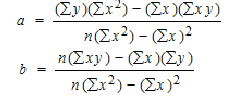

In [62]:
x = sum(area_df.values)
x

array([16400])

In [63]:
y = sum(price_df.values)
y

array([3130000])

In [76]:
x_squared = area_df.values**2
sum(x_squared)

array([54960000])

In [68]:
y_squared = price_df.values**2
sum(y_squared)


array([1981850000000])

In [75]:
x_times_y= area_df.values * price_df.values
n = len(area_df)
sum(x_times_y)

array([10425000000])

**calculating a:**

In [72]:
((3130000*54960000)-16400*10425000000)/(n*54960000-16400**2)

180616.43835616438

**notice that its value is equivalent to the value of the y-intercept obtained using the built-in function above.**